In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import pandas as pd
import pathlib
from utils import *

# Process results

In [3]:
data_path = pathlib.Path('/home/users/bjornmik/datasets/sweep_12/')

In [4]:
error_trials = compute_error_trials(data_path)

  0%|          | 0/600 [00:00<?, ?it/s]

In [61]:
errors = compute_errors(data_path, rectify=True, sample=100)

  0%|          | 0/4 [00:00<?, ?it/s]

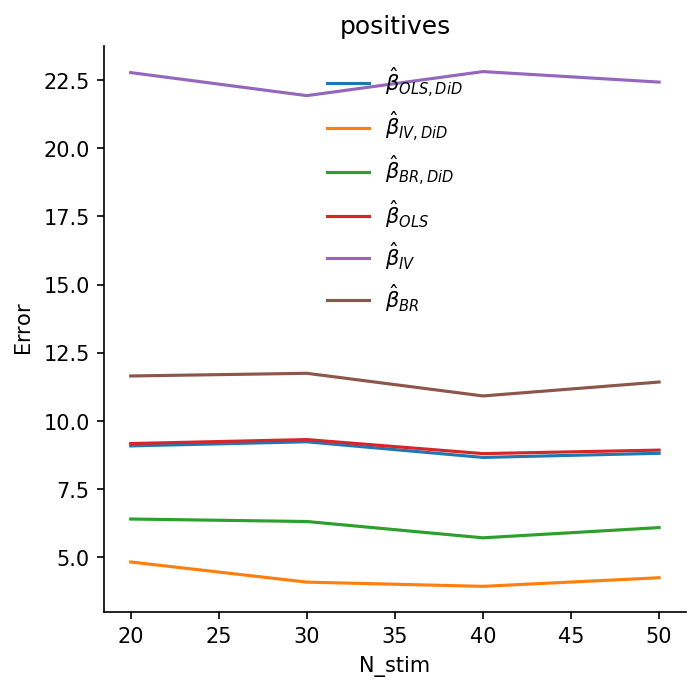

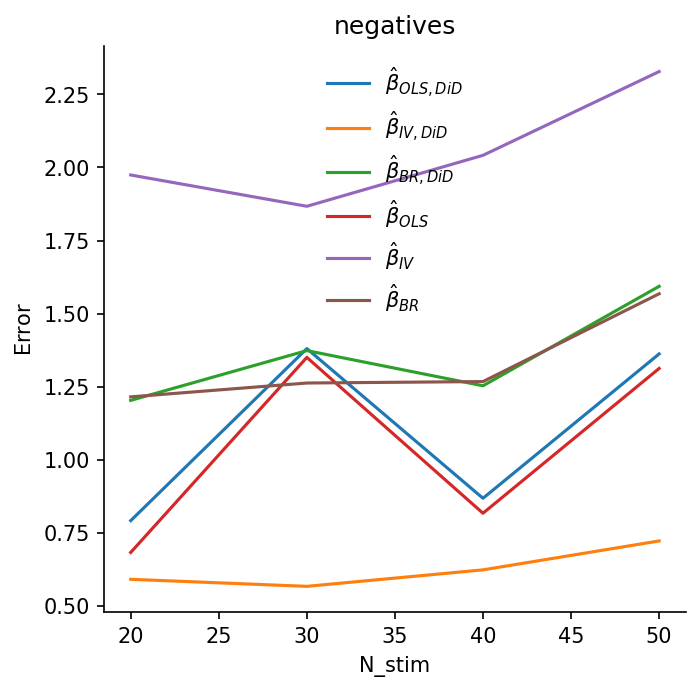

In [62]:
plot_errors(errors, 'n_stim')

In [6]:
errors = compute_error_confidence(errors, error_trials)

In [9]:
errors['positives'][['n_stim', 'error_ols_iv_did_pval', 'error_ols_iv_did_statistic']]

,n_stim,error_ols_iv_did_pval,error_ols_iv_did_statistic
0,30.0,3.896560e-18,0.0
1,20.0,3.896560e-18,0.0
2,50.0,3.896560e-18,0.0
3,40.0,3.896560e-18,0.0
4,5.0,3.896560e-18,0.0
5,10.0,3.896560e-18,0.0


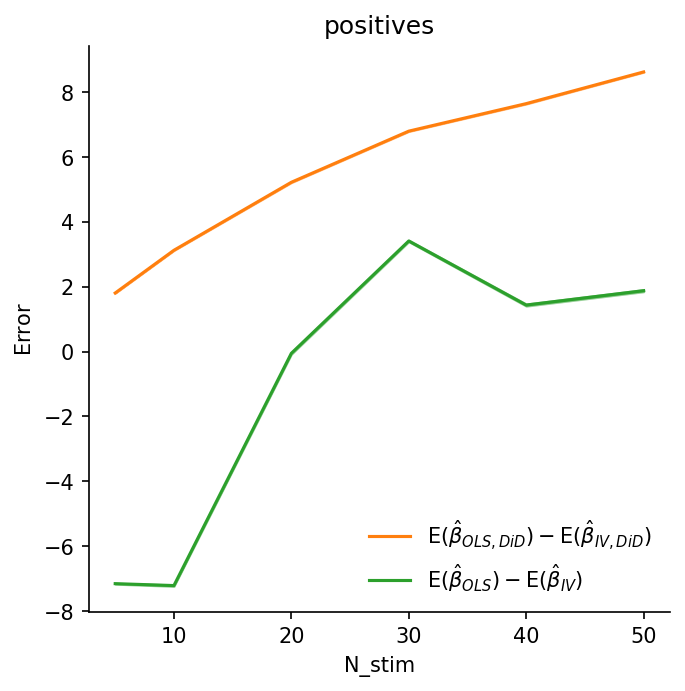

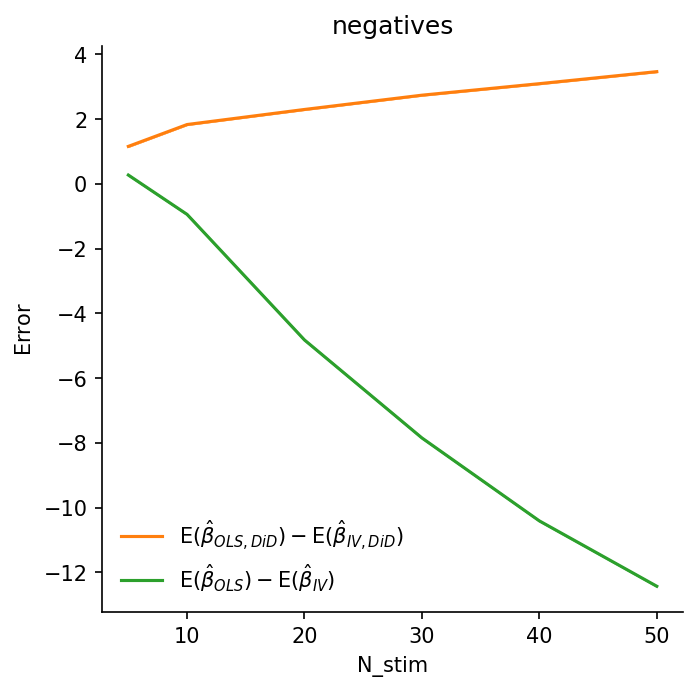

In [10]:
plot_error_difference(errors, 'n_stim')

# Convergence

In [11]:
error_convergence = compute_error_convergence(data_path)

  0%|          | 0/960 [00:00<?, ?it/s]

In [18]:
error_convergence_trials = compute_error_convergence_trials(data_path)

  0%|          | 0/9000 [00:00<?, ?it/s]

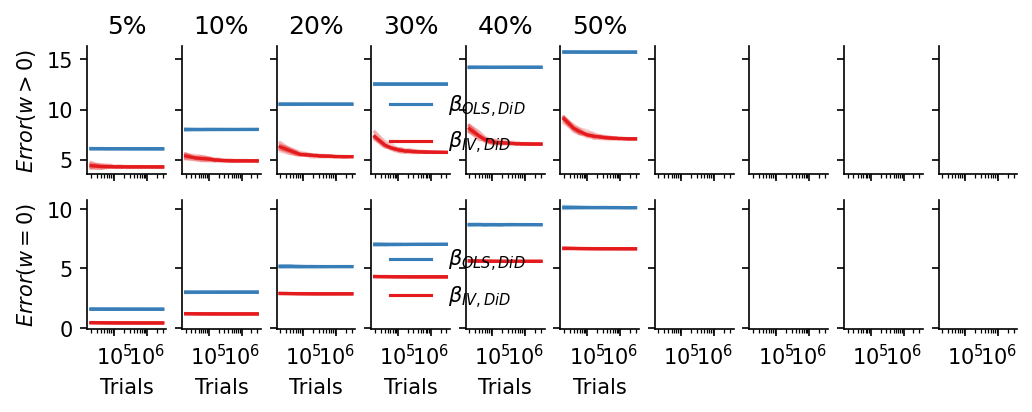

In [20]:
fig, axs = plt.subplots(2, 10, sharex=True, sharey='row', figsize=(8,2.5), dpi=150)
for i, (n_stim, df) in enumerate(errors['positives'].groupby('n_stim')):
    index = int(df.index.values)
    plot_error_convergence_trials( 
        error_convergence_trials, 
        index, 
        keys=['error_beta_ols_did','error_beta_iv_did'], 
        axs=axs.T[i], legend=i==4, xlabels=(False,True), ylabels=[i==0]*2)
    axs[0,i].set_title(f'{n_stim:.0f}%')

In [37]:
samples = compute_all_samples(data_path)

  0%|          | 0/6 [00:00<?, ?it/s]

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [31]:
index = int(errors['positives'].query('n_stim==50').index.values)
index

2

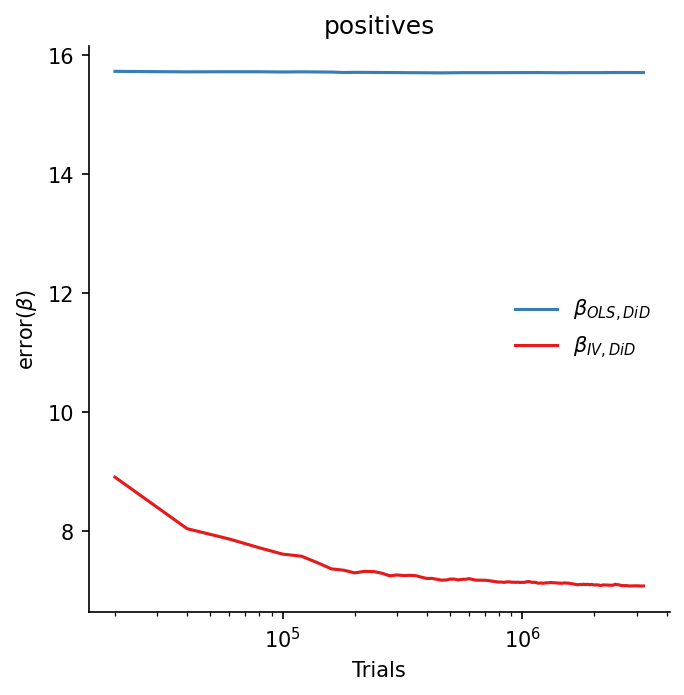

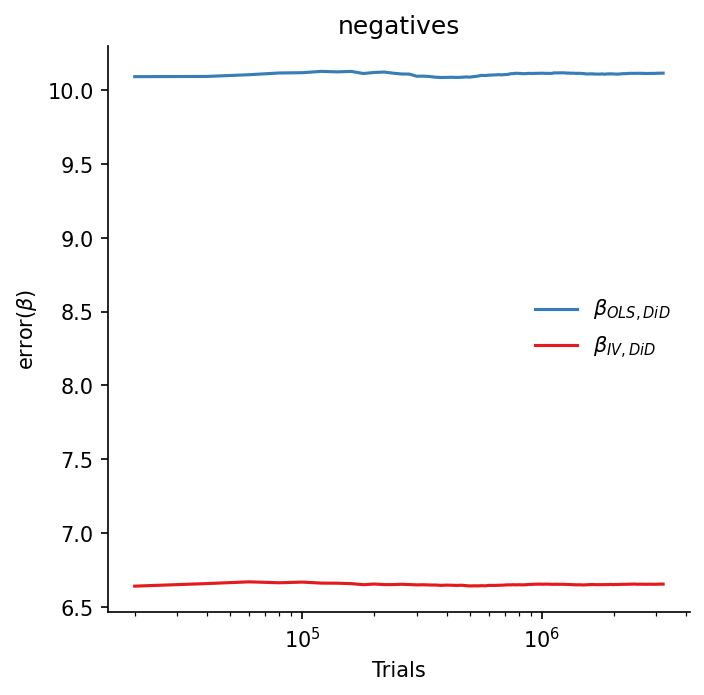

In [38]:
plot_error_convergence(error_convergence, index, ['error_beta_ols_did','error_beta_iv_did'])

# Regression

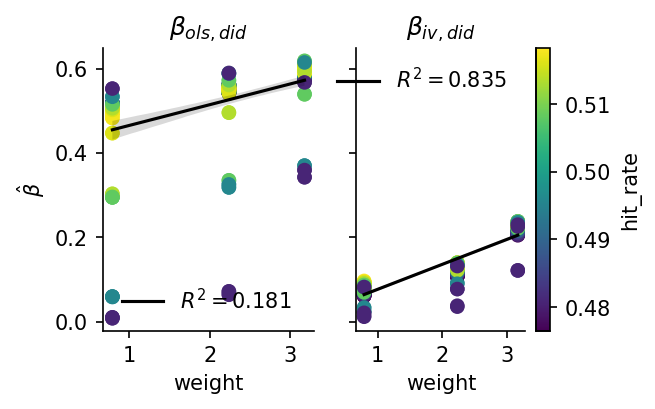

In [50]:
plot_regression(samples[index].query('weight>0'), ['beta_ols_did','beta_iv_did'], rectify=True)

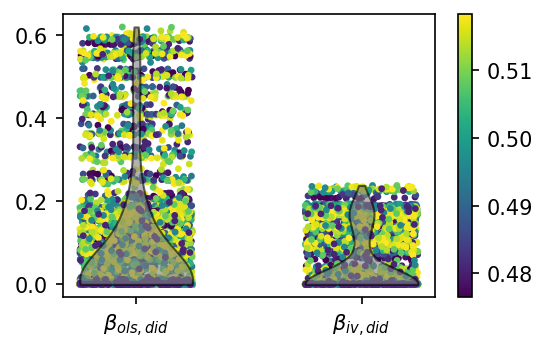

In [49]:
plot_false_positives(samples[index], ['beta_ols_did', 'beta_iv_did'], rectify=True)